<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Real Estate Data Challenge Machine Hack</h1>
</div>

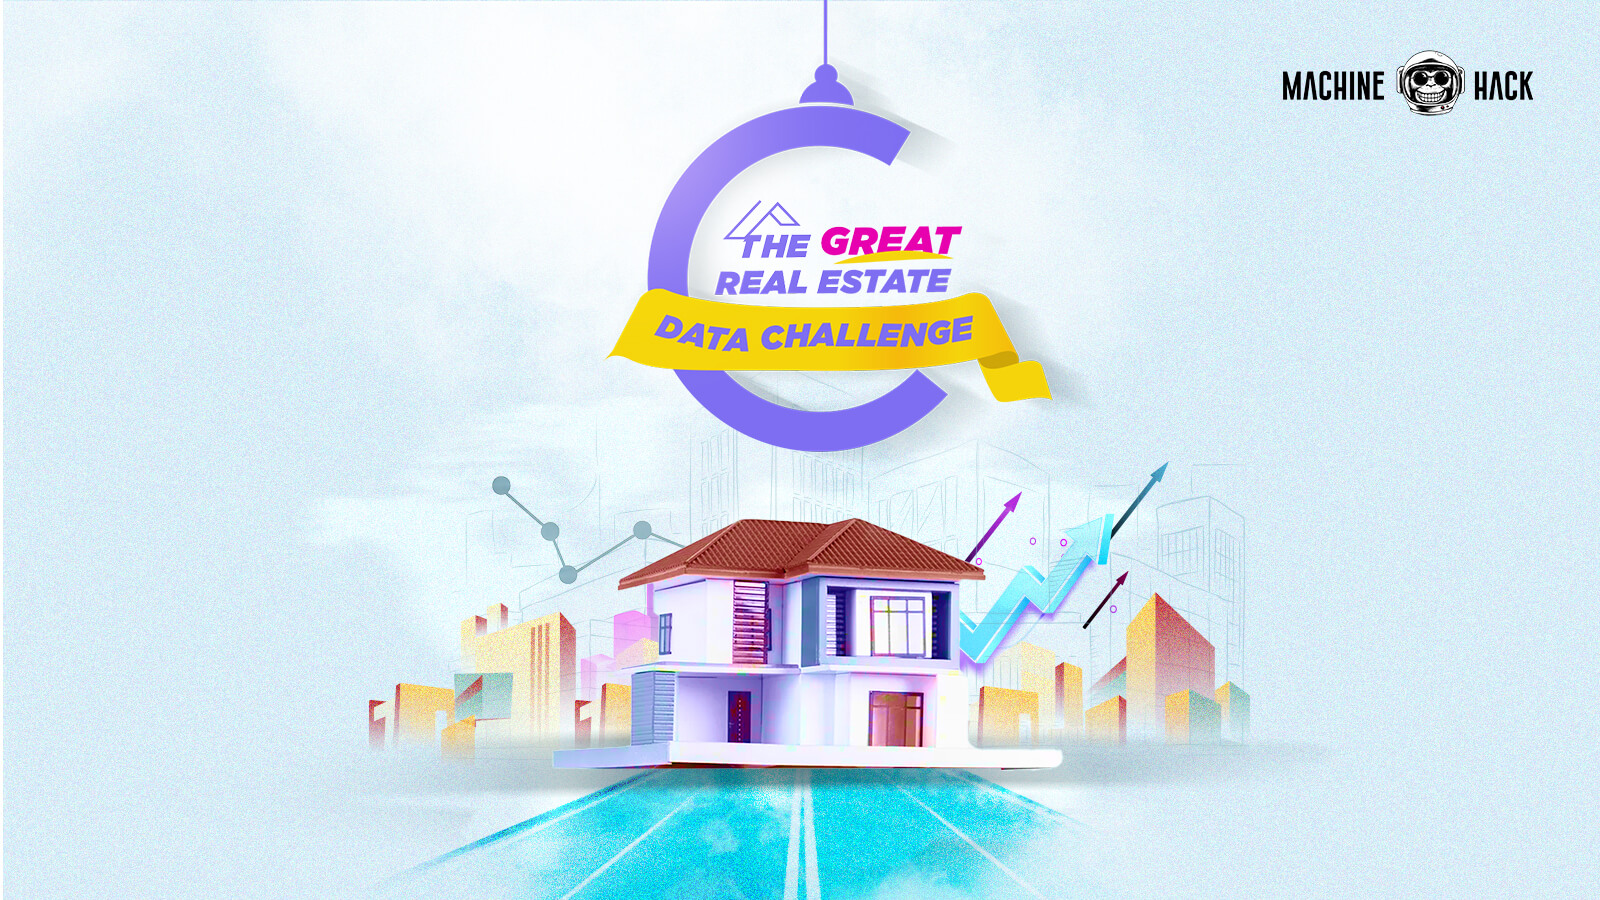

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- Machine Hack (Data Challenge- May 2023)
    
Problem Statement:- Build a machine learning-based approach to predict segment of the properties

# Problem Description

A dataset of real estate properties with locality, estimated price, and selling price for the last 23 years. 📊 The task is to identify the input features in the dataset and use them to predict the sale price of a property. 🔮 After this modelling of input and output features, predict the sale price of all the properties in the test dataset. 💵 Once the sale prices for the test data are predicted, put these properties into 4 segments. 🔢 These segments can be formed according to the gain. 💹 The gain is calculated based on the estimated price and predicted sale price (Gain = (Sale price - Estimated price)/100).

Finally, you need to submit your results as the segment level for each of the properties given in the test data. 📝 For reference, the properties need to be segmented into the following 4 segments according to the gain calculated based on the predicted sale:-

- 0: Premium Properties 💰🏰
- 1: Valuable Properties 💎🏡
- 2: Standard Properties 🏘️💸
- 3: Budget Properties  🏠💵

# Data Description

## Target

Segment: It is a categorical feature which is encoded based on the forecast. There are four segments.

- Segment 0 (Premium Properties): The segment likely includes high-end properties with large square footage, modern amenities, and upscale finishes.
- Segment 1 (Valuable Properties): The segment likely includes smaller apartments that are more affordable for people on a budget.
- Segment 2 (Standard Properties): The segment likely includes smaller homes that are affordable for first-time homebuyers.
- Segment 3 (Budget Properties): The segment likely includes properties that need some work or repairs to be fully functional.
- Sale Price: The actual price at which the property was sold, which may be higher or lower than the estimated value.

<b> Input features </b>

- Year: The year in which the property was sold or valued.
- Date: The date on which the property was sold or valued.
- Locality: The name of the town where the property is located.
- Address: The complete address of the property.
- Estimated Value: The estimated market value of the property, which is based on factors such as its location, size, and condition.
- Property: A categorical feature indicating the type of property. There are six different categories.
Condo
Single-Family
Three Family
Two Family
Four Family
Residential

- Residential: A categorical feature which further explains the category in which a certain property falls. There are five different types of categories.
Condominium
Detached House
Triplex
Duplex
Fourplex

- num_rooms: A numerical feature which defines the number of rooms (e.g. bedrooms, living rooms, etc.) in the property.
- carpet_area: The carpet area of the property, refers to the area of the floor that could be used for the flooring.
- property_tax_rate: The rate at which property taxes are assessed on the property, which may vary based on its location and year

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [831]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.titlesize'] = 14
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

#handle unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#no constraint on the data columns to be displayed in jupyter notebook
pd.options.display.max_columns = None

# Handle Date & Time
from datetime import datetime

# Handle zip files
import zipfile

# Print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

CatBoost version 1.1.1
NumPy version 1.20.1
Pandas version 1.2.4
seaborn version 0.11.1
sklearn version 0.24.1
xgboost version 1.7.1
lightgbm version 3.3.3


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Handle "Zip" File
- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [832]:
with zipfile.ZipFile(r'C:\Users\abarphe\Favorites\MH\GRED-May23\Participants_Data_TGREDC.zip', 'r') as zip_ref:
    #zip_ref.extractall(r'C:\Users\abarphe\Favorites\MH\GRED-May23')
    zip_ref.extractall('GRED-May23')
    zip_ref.close()

train = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\GRED-May23\train.csv')
test = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\GRED-May23\test.csv')
test1 = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\GRED-May23\test.csv')
submission = pd.read_csv (r'C:\Users\abarphe\Favorites\MH\GRED-May23\submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset
- Preprocessing of Train Dataset 
- Preprocessing of Test Dataset

In [833]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               553952 non-null  int64  
 1   Date               553952 non-null  object 
 2   Locality           553952 non-null  object 
 3   Address            553952 non-null  object 
 4   Estimated Value    553952 non-null  float64
 5   Sale Price         553952 non-null  float64
 6   Property           553952 non-null  object 
 7   Residential        553952 non-null  object 
 8   num_rooms          553952 non-null  int64  
 9   carpet_area        553952 non-null  int64  
 10  property_tax_rate  553952 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 46.5+ MB
None 

Shape of Train Data:-

(553952, 11) 

--------------------------------------------------------------------------------------------------------------------

In [834]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

   Year        Date      Locality             Address  Estimated Value  \
0  2009  2009-01-02     Greenwich    40 ETTL LN UT 24         711270.0   
1  2009  2009-01-02  East Hampton         18 BAUER RD         119970.0   
2  2009  2009-01-02    Ridgefield  48 HIGH VALLEY RD.         494530.0   
3  2009  2009-01-02      Old Lyme       56 MERIDEN RD         197600.0   
4  2009  2009-01-02     Naugatuck     13 CELENTANO DR         105440.0   

   Sale Price       Property     Residential  num_rooms  carpet_area  \
0    975000.0          Condo     Condominium          2          760   
1    189900.0  Single Family  Detached House          3          921   
2    825000.0  Single Family  Detached House          3          982   
3    450000.0  Single Family  Detached House          3          976   
4    200000.0  Single Family  Detached House          3          947   

   property_tax_rate  
0           1.025953  
1           1.025953  
2           1.025953  
3         

In [835]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

        Year        Date       Locality            Address  Estimated Value  \
553947  2022  2022-12-31        Enfield       50 SWORD AVE         122420.0   
553948  2022  2022-12-31      Naugatuck  10 ROLLINGWOOD DR         139180.0   
553949  2022  2022-12-31  South Windsor      189 PALMER DR         200000.0   
553950  2022  2022-12-31     Bloomfield  33 BURNWOOD DRIVE         195440.0   
553951  2022  2022-12-31       Stamford  154 GAYMOOR DRIVE         346600.0   

        Sale Price     Property     Residential  num_rooms  carpet_area  \
553947    198000.0  Residential  Detached House          3         1009   
553948    319900.0  Residential  Detached House          3          999   
553949    305000.0  Residential  Detached House          3         1017   
553950    271000.0  Residential  Detached House          3         1061   
553951    500000.0  Residential  Detached House          3         1003   

        property_tax_rate  
553947           1.003979 

In [836]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
count,553952.000000,553952,553952,553952,5.539520e+05,5.539520e+05,553952,553952,553952.000000,553952.000000,553952.000000
unique,NaN,4253,170,441774,NaN,NaN,6,5,NaN,NaN,NaN
top,NaN,2021-07-01,Bridgeport,33 NORTH WATER ST,NaN,NaN,Single Family,Detached House,NaN,NaN,NaN
freq,NaN,542,17672,54,NaN,NaN,394028,406463,NaN,NaN,NaN
mean,2016.118592,NaN,NaN,NaN,2.492291e+05,3.514670e+05,NaN,NaN,2.944452,988.759367,1.142287
std,4.146513,NaN,NaN,NaN,1.288889e+06,6.708937e+05,NaN,NaN,0.734628,247.027953,0.168563
min,2009.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,2.000000,600.000000,1.003979
25%,2012.000000,NaN,NaN,NaN,1.113700e+05,1.480000e+05,NaN,NaN,3.000000,915.000000,1.023495
50%,2017.000000,NaN,NaN,NaN,1.603000e+05,2.300000e+05,NaN,NaN,3.000000,984.000000,1.025846
75%,2020.000000,NaN,NaN,NaN,2.484000e+05,3.647000e+05,NaN,NaN,3.000000,1053.000000,1.348259


In [837]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate,Segment
count,43954.0,43954,43954,43954,4.395400e+04,43954.0,43954,43954,43954.000000,43954.000000,4.395400e+04,43954.0
unique,NaN,221,139,42842,NaN,NaN,1,5,NaN,NaN,NaN,NaN
top,NaN,2023-08-02,Stamford,374 GREEN HILL RD,NaN,NaN,Residential,Detached House,NaN,NaN,NaN,NaN
freq,NaN,498,1831,6,NaN,NaN,43954,30969,NaN,NaN,NaN,NaN
mean,2023.0,NaN,NaN,NaN,2.987318e+05,0.0,NaN,NaN,2.945193,990.205761,1.460000e+00,0.0
std,0.0,NaN,NaN,NaN,1.589689e+06,0.0,NaN,NaN,0.781515,263.057244,7.574028e-13,0.0
min,2023.0,NaN,NaN,NaN,1.000000e+02,0.0,NaN,NaN,2.000000,600.000000,1.460000e+00,0.0
25%,2023.0,NaN,NaN,NaN,1.048225e+05,0.0,NaN,NaN,3.000000,911.000000,1.460000e+00,0.0
50%,2023.0,NaN,NaN,NaN,1.565850e+05,0.0,NaN,NaN,3.000000,983.000000,1.460000e+00,0.0
75%,2023.0,NaN,NaN,NaN,2.528850e+05,0.0,NaN,NaN,3.000000,1053.000000,1.460000e+00,0.0


In [838]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
print(missing_val_train)

Checking Null entries & their Percentage in Train Data:-


                   Missing Values  Percentage Missing Values
Year                            0                        0.0
Date                            0                        0.0
Locality                        0                        0.0
Address                         0                        0.0
Estimated Value                 0                        0.0
Sale Price                      0                        0.0
Property                        0                        0.0
Residential                     0                        0.0
num_rooms                       0                        0.0
carpet_area                     0                        0.0
property_tax_rate               0                        0.0


In [839]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
Year,0,0.0
Date,0,0.0
Locality,0,0.0
Address,0,0.0
Estimated Value,0,0.0
Sale Price,0,0.0
Property,0,0.0
Residential,0,0.0
num_rooms,0,0.0
carpet_area,0,0.0


In [840]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col, train[col].nunique(), train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,14,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201..."
1,Date,4253,"[2009-01-02, 2009-01-03, 2009-01-04, 2009-01-0..."
2,Locality,170,"[Greenwich, East Hampton, Ridgefield, Old Lyme..."
3,Address,441774,"[40 ETTL LN UT 24, 18 BAUER RD, 48 HIGH VALLEY..."
4,Estimated Value,73310,"[711270.0, 119970.0, 494530.0, 197600.0, 10544..."
5,Sale Price,35825,"[975000.0, 189900.0, 825000.0, 450000.0, 20000..."
6,Property,6,"[Condo, Single Family, Three Family, Two Famil..."
7,Residential,5,"[Condominium, Detached House, Triplex, Duplex,..."
8,num_rooms,5,"[2, 3, 6, 4, 8]"
9,carpet_area,1686,"[760, 921, 982, 976, 947, 1084, 1082, 657, 750..."


In [841]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col, test[col].nunique(), test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,1,[2023]
1,Date,221,"[2023-01-01, 2023-01-04, 2023-01-05, 2023-01-0..."
2,Locality,139,"[Old Lyme, Ridgefield, Cromwell, New Haven, Be..."
3,Address,42842,"[12 SWAN AVE, 59 LINCOLN LANE, 6 GROVE RD, 346..."
4,Estimated Value,24877,"[151400.0, 686900.0, 152030.0, 156130.0, 10897..."
5,Sale Price,1,[0]
6,Property,1,[Residential]
7,Residential,5,"[Detached House, Duplex, Condominium, Triplex,..."
8,num_rooms,5,"[3, 4, 2, 6, 8]"
9,carpet_area,1256,"[947.0, 1051.0, 925.0, 1210.0, 1089.0, 784.0, ..."


In [842]:
# Preprocessing of Train Dataset

# Convert "Date" Column into "DateTime" Format
train['Date'] = pd.to_datetime(train['Date'])
# Convert "Address" Column into "String" Format
train['Address'] = train['Address'].astype('string')

In [843]:
# Preprocessing of Test Dataset

# Convert "Date" Column into "DateTime" Format
test['Date'] = pd.to_datetime(test['Date'])
# Convert "Address" Column into "String" Format
test['Address'] = test['Address'].astype('string')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [844]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64','float64']).columns
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

# Segregation of Catagorical Columns from Train Data
cat_cols_train = train.select_dtypes(['object']).columns
print("Catagorical Columns in Train Data are :-\n\n")
print(cat_cols_train)
print('-------------'*9)

Numerical Columns in Train Data are :-


Index(['Year', 'Estimated Value', 'Sale Price', 'num_rooms', 'carpet_area',
       'property_tax_rate'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------------
Catagorical Columns in Train Data are :-


Index(['Locality', 'Property', 'Residential'], dtype='object')
---------------------------------------------------------------------------------------------------------------------


In [845]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "Year" :0

Lower Limit in "Year" : 2000.0

Upper Limit in "Year" : 2032.0

Inter Quartile Range of "Year" : 8.0 


Number of outliers in "Estimated Value" :50052

Lower Limit in "Estimated Value" : -94175.0

Upper Limit in "Estimated Value" : 453945.0

Inter Quartile Range of "Estimated Value" : 137030.0 


Number of outliers in "Sale Price" :45719

Lower Limit in "Sale Price" : -177050.0

Upper Limit in "Sale Price" : 689750.0

Inter Quartile Range of "Sale Price" : 216700.0 


Number of outliers in "num_rooms" :147489

Lower Limit in "num_rooms" : 3.0

Upper Limit in "num_rooms" : 3.0

Inter Quartile Range of "num_rooms" : 0.0 


Number of outliers in "carpet_area" :92966

Lower Limit in "carpet_area" : 708.0

Upper Limit in "carpet_area" : 1260.0

Inter Quartile Range of "carpet_area" : 138.0 


Number of outliers in "property_tax_rate" :0

Lower Limit in "property_tax_rate" : 0.5363502499999996

Upper Limit in "property_tax_rate" : 1.8354042500000003

Inter Q

Name of Categorical Variable:- Locality 

Bridgeport       17672
Waterbury        15537
Stamford         15341
Norwalk          12800
Fairfield        11118
                 ...  
Scotland           223
Eastford           222
Canaan             220
Union               99
***Unknown***        1
Name: Locality, Length: 170, dtype: int64


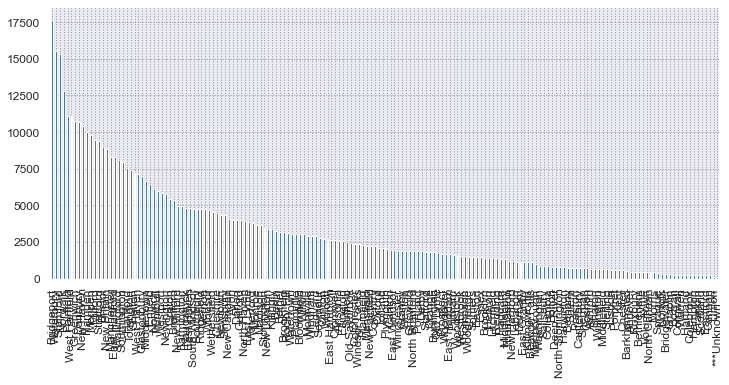

Name of Categorical Variable:- Property 

Single Family    394028
Condo            102981
Two Family        25800
Residential       16774
Three Family      12255
Four Family        2114
Name: Property, dtype: int64


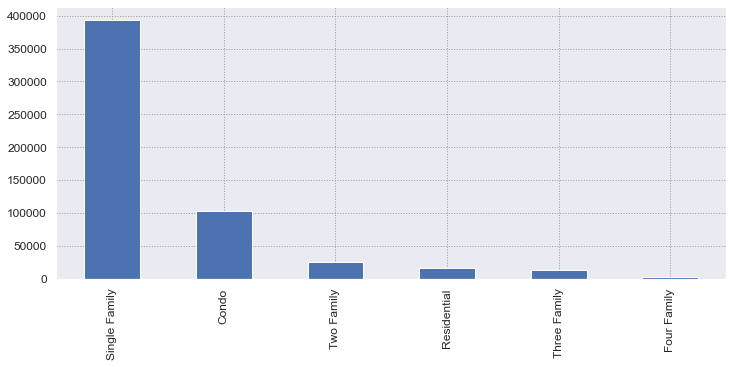

Name of Categorical Variable:- Residential 

Detached House    406463
Condominium       106103
Duplex             26587
Triplex            12625
Fourplex            2174
Name: Residential, dtype: int64


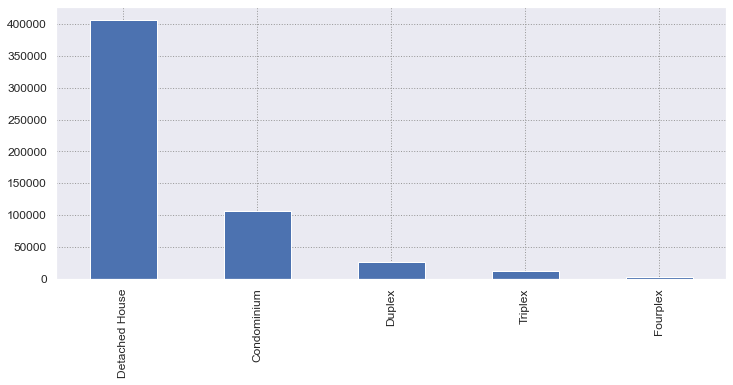

In [846]:
# Univariate Analysis of Categorical Variables in Train DataSet

for x in cat_cols_train:
    print("Name of Categorical Variable:-",x,'\n')
    print(train[x].value_counts())
    train[x].value_counts().plot.bar()
    plt.show()

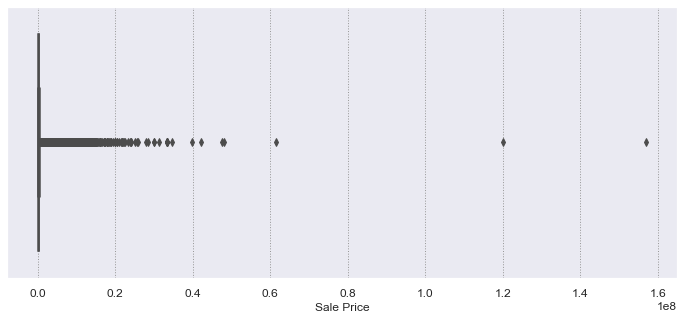

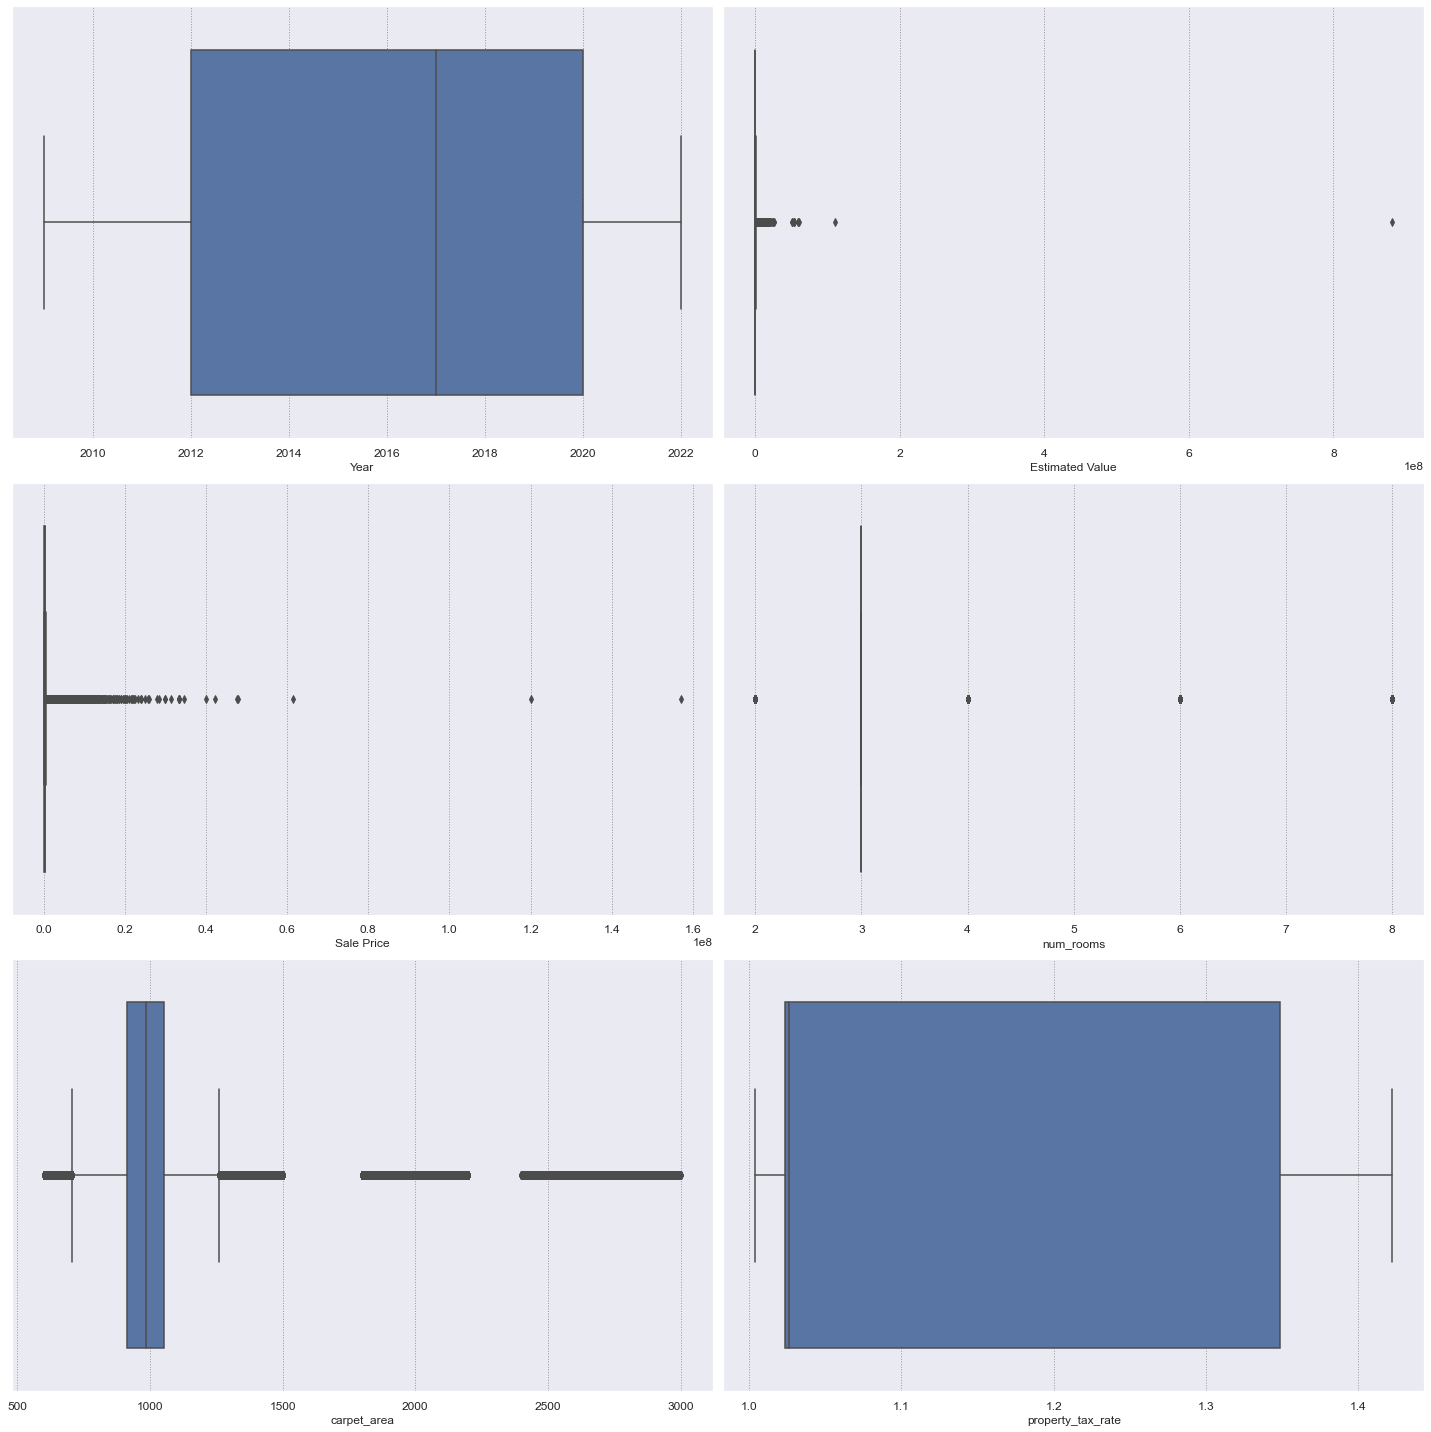

In [847]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(train['Sale Price']);

# Independent Numerical Variable
Create_BoxPlotS(train,num_cols_train,3,2)

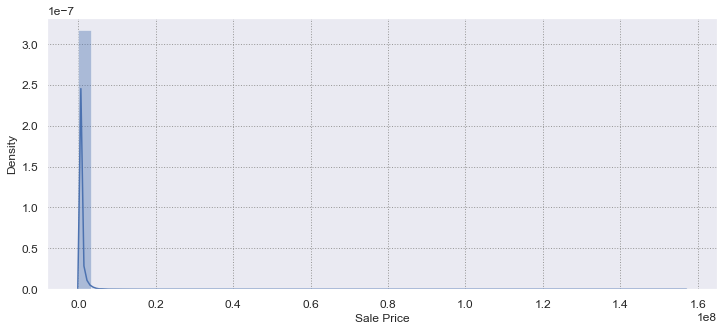

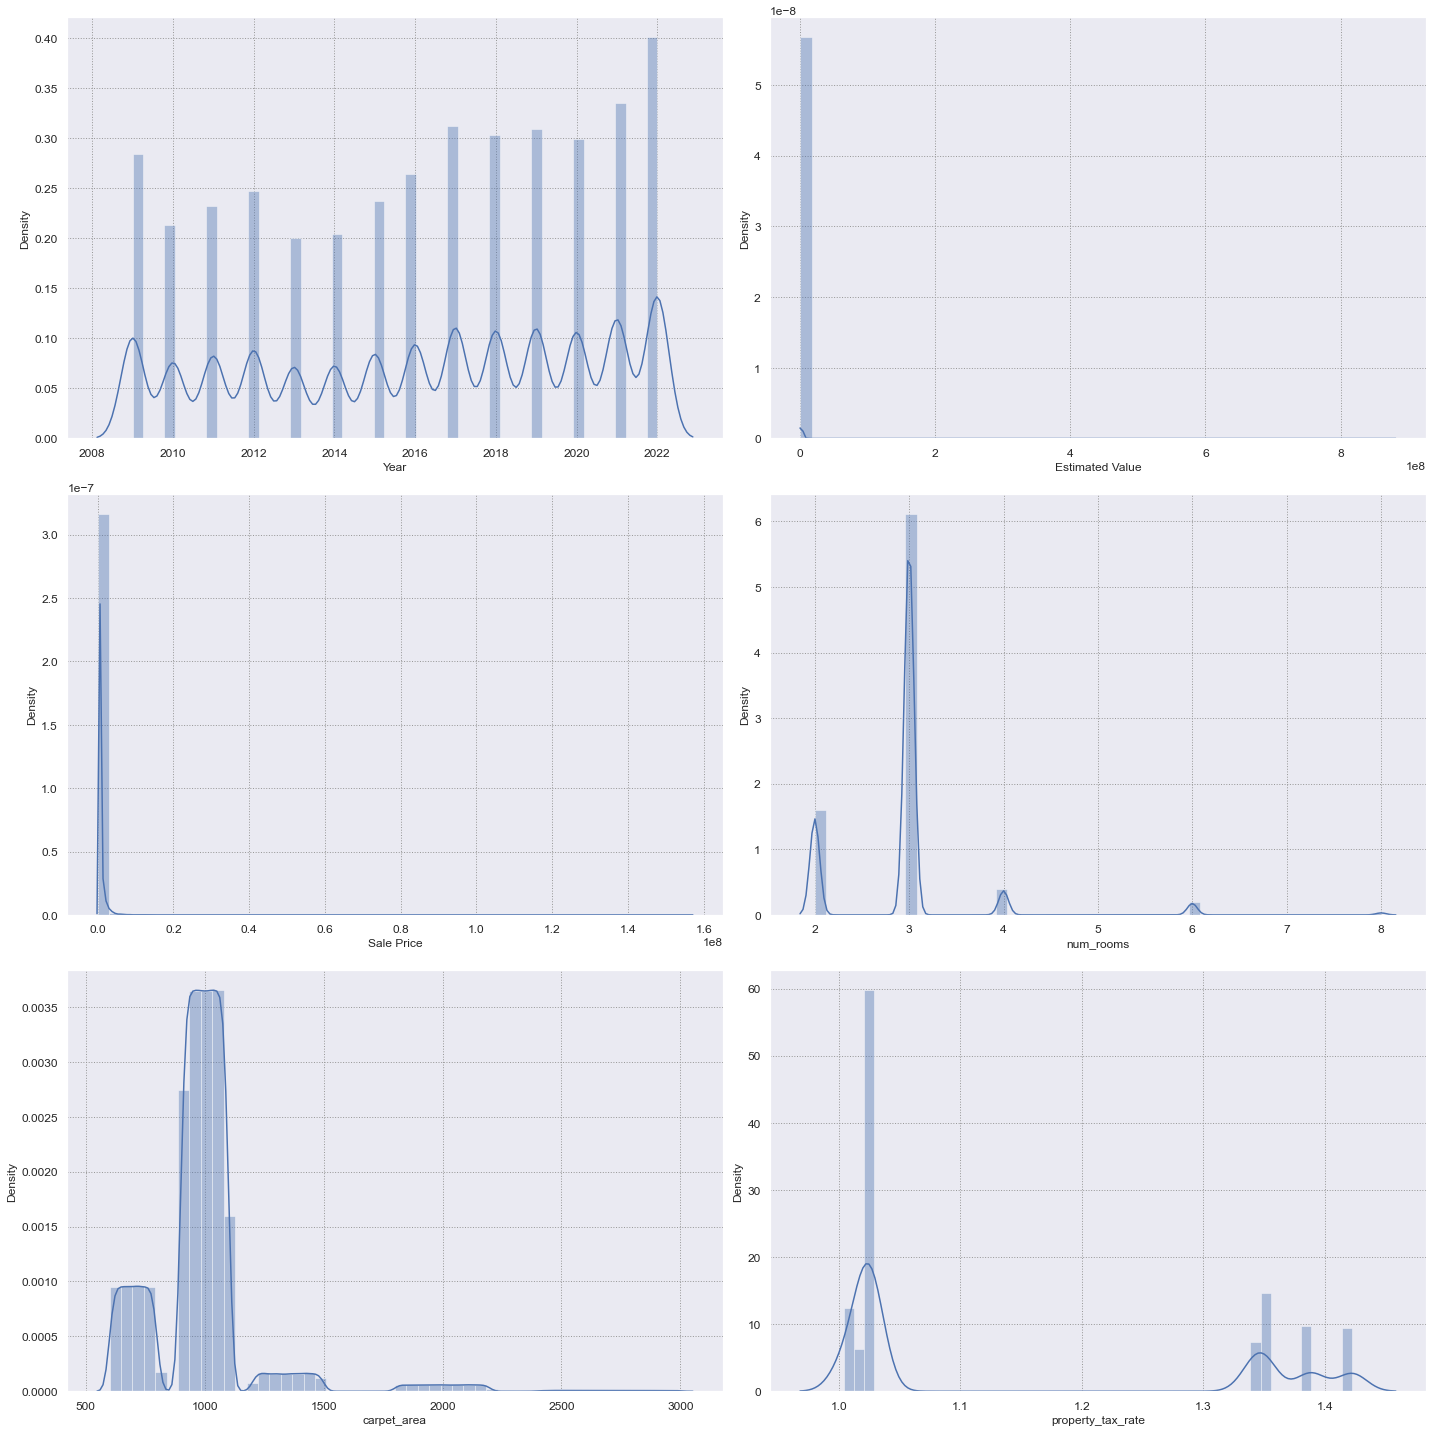

In [848]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(train['Sale Price']);

# Independent Numerical Variable
Create_DistPlots(train,num_cols_train,3,2)

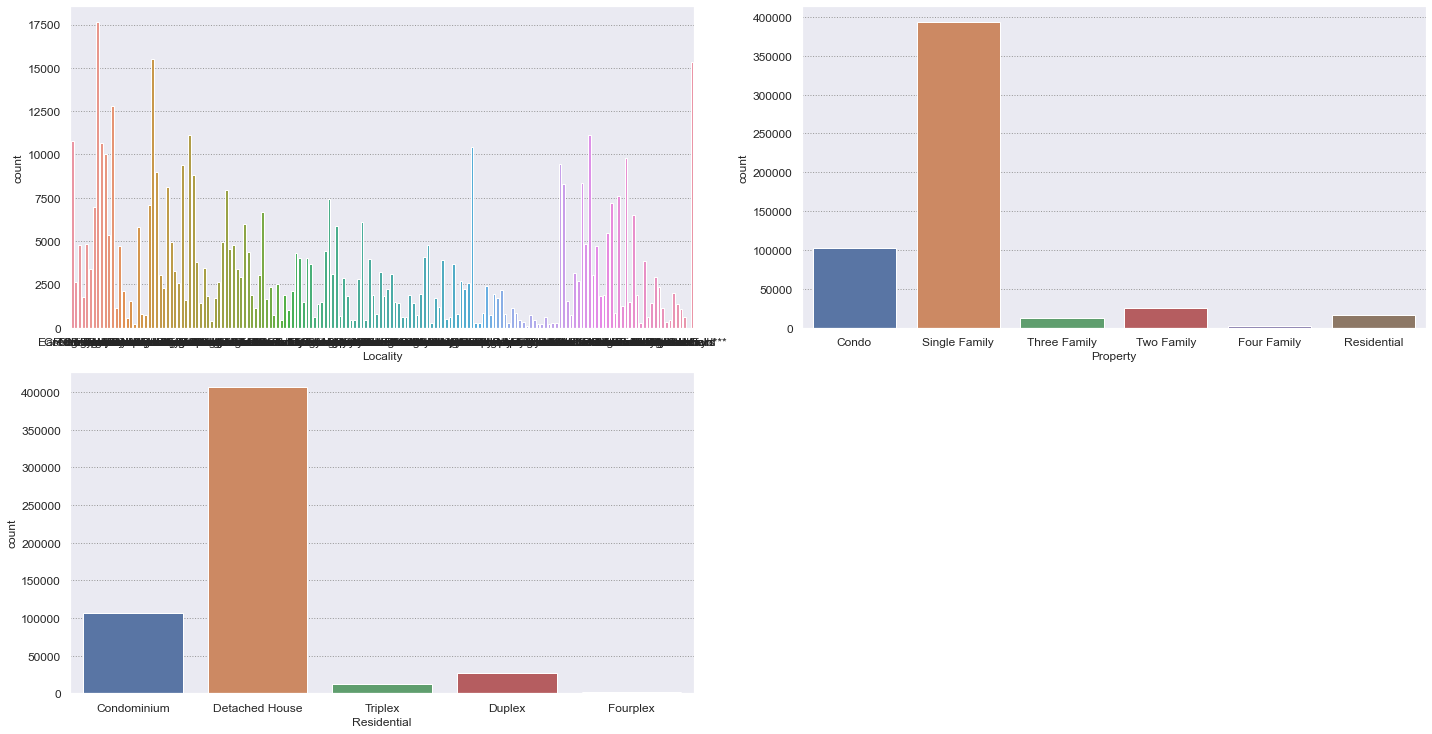

In [849]:
# Univariate Analysis of Catagorical Variables in Train Dataset
Univariate_Cat_Features(train,cat_cols_train,4,2)

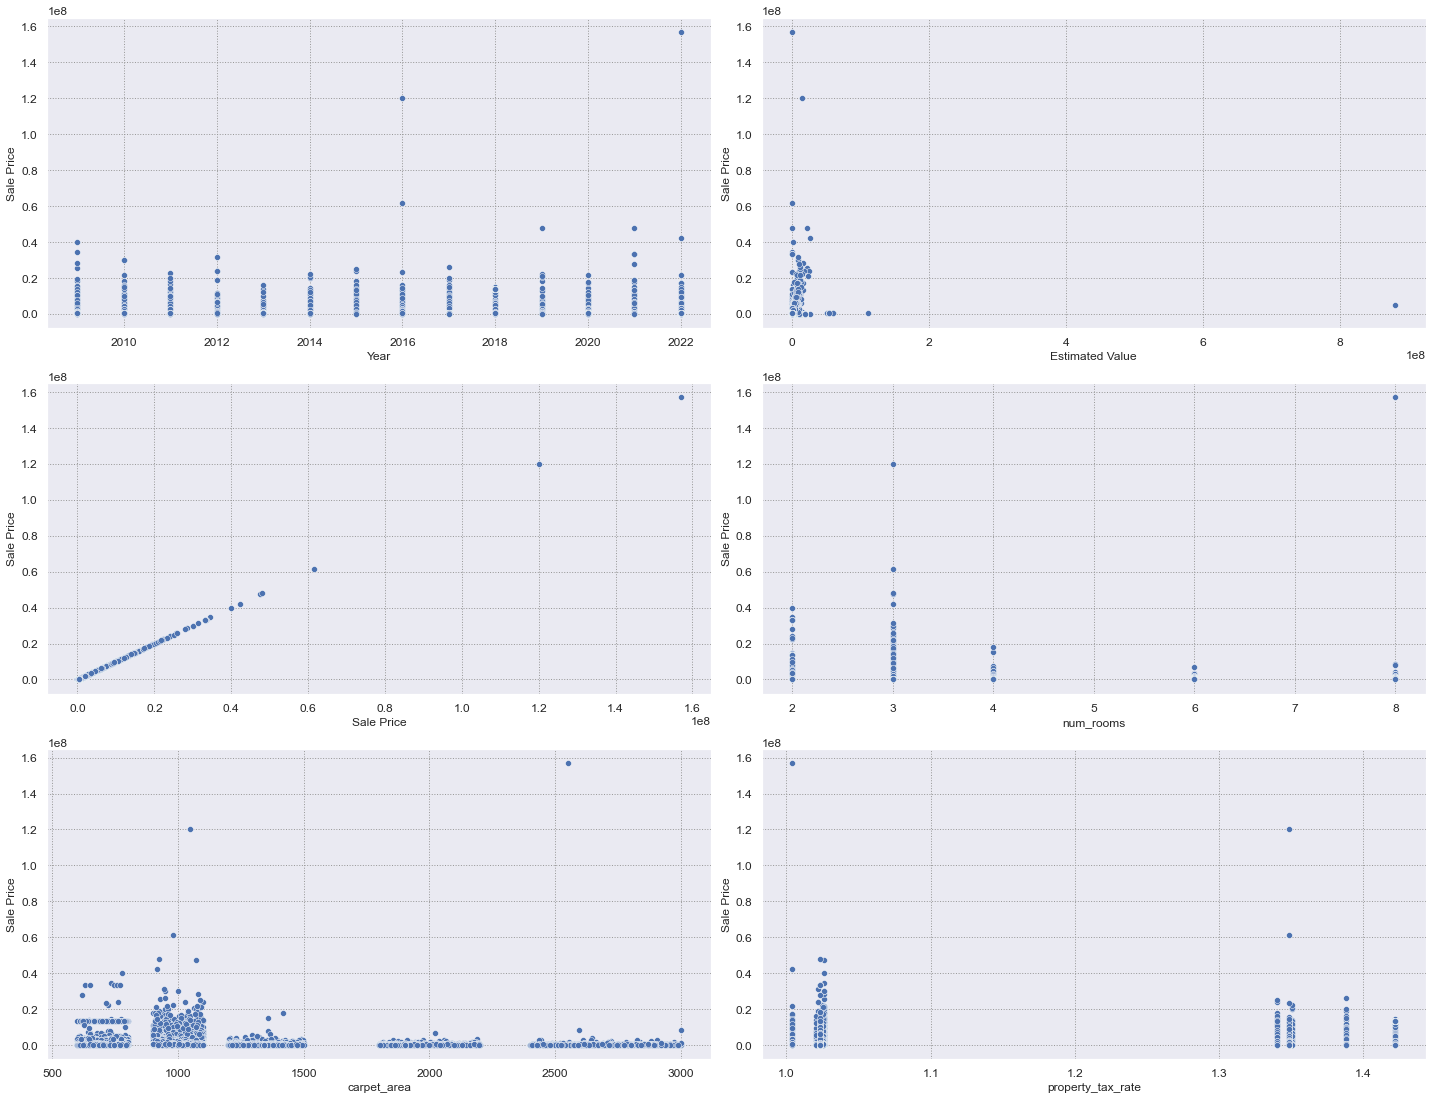

In [850]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'Sale Price',4,2)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Label Encoding of Train Dataset

In [851]:
# Convert Categorical Column into NUmerical Format
Label_Encoder(train)

In [852]:
# Check if the "Sale Price" value is 0 in "Train Dataset"
sale_price = [0.0,0]
print(train[train['Sale Price'].isin(sale_price)])

'''Why We are Checking?:-Sale Price indicate actual Sell price of the Property. Mostly it is higher than Estimated Value, 
Sometimes Lower too. But cannot be Zero as Estimated Value for corresponding Properties are non Zero.'''  

        Year       Date  Locality                 Address  Estimated Value  \
4130    2009 2009-02-14       155           54 MALTBY AVE         240100.0   
6669    2009 2009-03-12        94        28 PARKWAY SOUTH         142940.0   
14736   2009 2009-05-21        60      83 LONG HILL FARMS         245000.0   
18857   2009 2009-06-21        94            30 TRUMAN ST          95830.0   
26106   2009 2009-08-08       138           STONYBROOK RD       19110000.0   
...      ...        ...       ...                     ...              ...   
441723  2020 2020-11-09         7  1275 WORTHINGTON RIDGE         112000.0   
442424  2020 2020-11-15         7   127 WETHERSFIELD ROAD         157100.0   
442832  2020 2020-11-19         7  218 BROOKE MEADOW ROAD         231000.0   
442846  2020 2020-11-19         7  218 BROOKE MEADOW ROAD         231000.0   
443478  2020 2020-11-26         7    416 SAVAGE HILL ROAD         158300.0   

        Sale Price  Property  Residential  num_rooms  carpet_ar

'Why We are Checking?:-Sale Price indicate actual Sell price of the Property. Mostly it is higher than Estimated Value, \nSometimes Lower too. But cannot be Zero as Estimated Value for corresponding Properties are non Zero.'

In [853]:
# Check if the "Estimated Value" is 0 in "Train Dataset"
sale_price = [0.0,0]
print(train[train['Estimated Value'].isin(sale_price)])

''' Why we are Checking?:-Estimated Value of the Property is Zero where corresponding "Sale Price" is non Zero '''  

        Year       Date  Locality                   Address  Estimated Value  \
111     2009 2009-01-02       139         69 BOYSENBERRY CT              0.0   
206     2009 2009-01-02       104        296 HAMILTON AVE 7              0.0   
216     2009 2009-01-03       132             217 DUNHAM 14              0.0   
254     2009 2009-01-03        57                 1 PARK ST              0.0   
261     2009 2009-01-03       118               MAIN ST P B              0.0   
...      ...        ...       ...                       ...              ...   
552646  2022 2022-12-23         6        11 TWIN OAKS TRAIL              0.0   
552720  2022 2022-12-23        57   125 FIELD POINT ROAD B6              0.0   
552826  2022 2022-12-23        57   125 FIELD POINT ROAD A2              0.0   
553606  2022 2022-12-30        57   125 FIELD POINT ROAD B4              0.0   
553892  2022 2022-12-31        57  FIELD POINT ROAD 0125 A6              0.0   

        Sale Price  Property  Residenti

' Why we are Checking?:-Estimated Value of the Property is Zero where corresponding "Sale Price" is non Zero '

In [854]:
# Drop record/s where Estimated_Value = Zero or Sale_Price = Zero
train = train.drop(train[(train['Estimated Value']==0) | (train['Sale Price']==0)].index)

In [855]:
# Derived Feature in "Train" Dataset
train['Property_Tax'] = train['carpet_area'] * train['property_tax_rate']

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Label Encoding of Test Dataset

In [856]:
Label_Encoder(test)

In [857]:
# Check if the "Sale Price" value is 0 in "Test Dataset"
''' Not Applicable for Test Dataset as we need to predict Sale_Price in Test Dataset'''  

' Not Applicable for Test Dataset as we need to predict Sale_Price in Test Dataset'

In [858]:
# Check if the "Estimated Value" is 0 in "Test Dataset"
sale_price = [0.0,0]
print(test[test['Estimated Value'].isin(sale_price)])

''' All Estimated_Value in Test Dataset are Non Zero '''  

Empty DataFrame
Columns: [Year, Date, Locality, Address, Estimated Value, Sale Price, Property, Residential, num_rooms, carpet_area, property_tax_rate, Segment]
Index: []


' All Estimated_Value in Test Dataset are Non Zero '

In [859]:
# Derived Feature in "Test" Dataset

test['Property_Tax'] = test['carpet_area'] * test['property_tax_rate']    

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Additional Data Visualization</h2>
</div>

- After Processing of "Train" Data

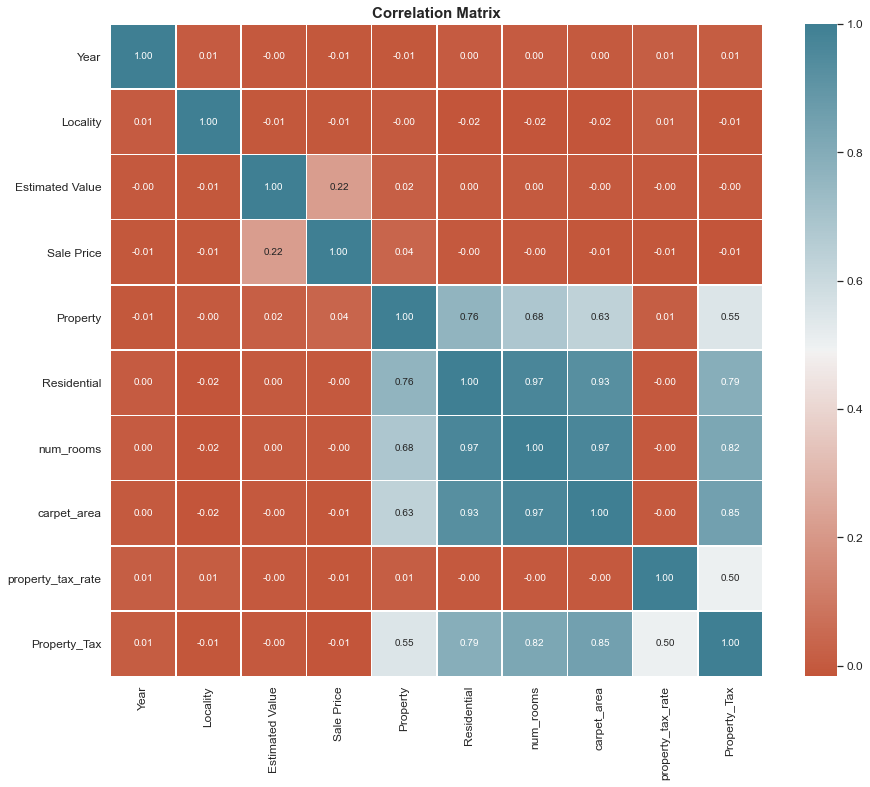

In [860]:
# Correlation matrix

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [861]:
train.isnull().sum()

Year                 0
Date                 0
Locality             0
Address              0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
Property_Tax         0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [862]:
test.isnull().sum()

Year                 0
Date                 0
Locality             0
Address              0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
Segment              0
Property_Tax         0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [797]:
drop_columns = ['Address','Date','carpet_area','property_tax_rate','Estimated Value']

train = train.drop(drop_columns,axis=1)
print('-------------'*9)
test = test.drop(drop_columns,axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [798]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552033 entries, 0 to 553951
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          552033 non-null  int64  
 1   Locality      552033 non-null  int32  
 2   Sale Price    552033 non-null  float64
 3   Property      552033 non-null  int32  
 4   Residential   552033 non-null  int32  
 5   num_rooms     552033 non-null  int64  
 6   Property_Tax  552033 non-null  float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 27.4 MB


In [799]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43954 entries, 0 to 43953
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          43954 non-null  int64  
 1   Locality      43954 non-null  int32  
 2   Sale Price    43954 non-null  int64  
 3   Property      43954 non-null  int32  
 4   Residential   43954 non-null  int32  
 5   num_rooms     43954 non-null  int64  
 6   Segment       43954 non-null  int64  
 7   Property_Tax  43954 non-null  float64
dtypes: float64(1), int32(3), int64(4)
memory usage: 2.2 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [800]:
train_temp,test_temp=train_test_split(train,test_size=0.15,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-"
      ,len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='Sale Price'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]


test = test.drop(['Sale Price','Segment'],axis=1) 

Length of Original Data:- 552033 
Length of Train Data:- 469228 
Length of Test Data:- 82805
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['Year', 'Locality', 'Property', 'Residential', 'num_rooms', 'Property_Tax']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- Sale Price
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Linear Regression</h2>
</div>

In [258]:
model1 = LinearRegression()
model1.fit(X_train,y_train) 
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.31705
# Private Score:- 0.31258

Accuracy of Linear Regression on training set: 0.00
Accuracy of Linear Regression on test set: 0.01
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Decision Tree Regressor</h2>
</div>

In [316]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train) 
print('Accuracy of Decision Tree Regressor on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Decision Tree Regressor on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.20187
# Private Score:- 0.19784

Accuracy of Decision Tree Regressor on training set: 0.71
Accuracy of Decision Tree Regressor on test set: -0.04
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Random Forest Regressor</h2>
</div>

In [396]:
model3 = RandomForestRegressor(random_state = 0)
model3.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Random Forest Regressor on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.30735
# Private Score:- 0.30175

Accuracy of Random Forest Regressor on training set: 0.66
Accuracy of Random Forest Regressor on test set: 0.16
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Cat Boost Regressor</h2>
</div>

In [436]:
model4 = CatBoostRegressor()
model4.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.19891
# Private Score:- 0.20187

Learning rate set to 0.108208
0:	learn: 668936.8236050	total: 236ms	remaining: 3m 56s
1:	learn: 660250.7342909	total: 296ms	remaining: 2m 27s
2:	learn: 653288.7186448	total: 357ms	remaining: 1m 58s
3:	learn: 647370.1065911	total: 416ms	remaining: 1m 43s
4:	learn: 641303.2454070	total: 475ms	remaining: 1m 34s
5:	learn: 636173.8655121	total: 533ms	remaining: 1m 28s
6:	learn: 632861.1361016	total: 594ms	remaining: 1m 24s
7:	learn: 629820.8581137	total: 647ms	remaining: 1m 20s
8:	learn: 627973.7437589	total: 708ms	remaining: 1m 17s
9:	learn: 626469.8732611	total: 767ms	remaining: 1m 15s
10:	learn: 625045.8273699	total: 829ms	remaining: 1m 14s
11:	learn: 623019.3090425	total: 892ms	remaining: 1m 13s
12:	learn: 620681.0519521	total: 959ms	remaining: 1m 12s
13:	learn: 619516.1581368	total: 1.01s	remaining: 1m 11s
14:	learn: 618574.2794390	total: 1.05s	remaining: 1m 9s
15:	learn: 614980.8103073	total: 1.12s	remaining: 1m 8s
16:	learn: 612078.8670507	total: 1.16s	remaining: 1m 7s
17:	learn: 611

149:	learn: 552830.6572564	total: 8.54s	remaining: 48.4s
150:	learn: 552797.6116498	total: 8.59s	remaining: 48.3s
151:	learn: 552764.3344532	total: 8.65s	remaining: 48.3s
152:	learn: 552712.0952505	total: 8.71s	remaining: 48.2s
153:	learn: 552634.7323390	total: 8.77s	remaining: 48.2s
154:	learn: 552583.4759514	total: 8.82s	remaining: 48.1s
155:	learn: 552540.9011945	total: 8.86s	remaining: 48s
156:	learn: 552062.8929551	total: 8.91s	remaining: 47.8s
157:	learn: 552033.9570517	total: 8.96s	remaining: 47.7s
158:	learn: 551992.8747367	total: 9.01s	remaining: 47.7s
159:	learn: 551909.3650297	total: 9.07s	remaining: 47.6s
160:	learn: 551878.9293153	total: 9.12s	remaining: 47.5s
161:	learn: 551853.1787380	total: 9.18s	remaining: 47.5s
162:	learn: 551809.4001957	total: 9.23s	remaining: 47.4s
163:	learn: 551792.5659098	total: 9.28s	remaining: 47.3s
164:	learn: 551750.8372430	total: 9.33s	remaining: 47.2s
165:	learn: 551726.8371438	total: 9.38s	remaining: 47.1s
166:	learn: 551582.9498758	total:

296:	learn: 545239.0956195	total: 16.5s	remaining: 39s
297:	learn: 545203.0418174	total: 16.5s	remaining: 39s
298:	learn: 545193.1162821	total: 16.6s	remaining: 38.9s
299:	learn: 544623.2035358	total: 16.7s	remaining: 38.9s
300:	learn: 544584.7489007	total: 16.7s	remaining: 38.9s
301:	learn: 544567.9002782	total: 16.8s	remaining: 38.8s
302:	learn: 544045.3079392	total: 16.8s	remaining: 38.7s
303:	learn: 544037.4827011	total: 16.9s	remaining: 38.7s
304:	learn: 543559.2114249	total: 16.9s	remaining: 38.6s
305:	learn: 543538.7328116	total: 17s	remaining: 38.5s
306:	learn: 543103.5924509	total: 17s	remaining: 38.4s
307:	learn: 543089.5168120	total: 17.1s	remaining: 38.4s
308:	learn: 543085.0909671	total: 17.1s	remaining: 38.3s
309:	learn: 542685.2346899	total: 17.2s	remaining: 38.2s
310:	learn: 542677.7264299	total: 17.2s	remaining: 38.2s
311:	learn: 542669.5745549	total: 17.3s	remaining: 38.1s
312:	learn: 542657.2262355	total: 17.3s	remaining: 38s
313:	learn: 542644.1600050	total: 17.4s	r

442:	learn: 536382.1686215	total: 24.7s	remaining: 31.1s
443:	learn: 536266.6418318	total: 24.8s	remaining: 31s
444:	learn: 536262.0222886	total: 24.8s	remaining: 31s
445:	learn: 536259.0836004	total: 24.9s	remaining: 30.9s
446:	learn: 536253.0262804	total: 25s	remaining: 30.9s
447:	learn: 536239.9588384	total: 25s	remaining: 30.8s
448:	learn: 536232.7012049	total: 25.1s	remaining: 30.8s
449:	learn: 536226.2573667	total: 25.1s	remaining: 30.7s
450:	learn: 536206.7487543	total: 25.2s	remaining: 30.6s
451:	learn: 536197.3221064	total: 25.2s	remaining: 30.6s
452:	learn: 536176.7596626	total: 25.3s	remaining: 30.5s
453:	learn: 536139.9368795	total: 25.3s	remaining: 30.4s
454:	learn: 536081.1498276	total: 25.4s	remaining: 30.4s
455:	learn: 536074.3840098	total: 25.4s	remaining: 30.3s
456:	learn: 536005.7237498	total: 25.5s	remaining: 30.2s
457:	learn: 535943.6078665	total: 25.5s	remaining: 30.2s
458:	learn: 535938.4297795	total: 25.5s	remaining: 30.1s
459:	learn: 535935.7257264	total: 25.6s

587:	learn: 534064.2841478	total: 32.8s	remaining: 23s
588:	learn: 534048.1858961	total: 32.8s	remaining: 22.9s
589:	learn: 534000.0005714	total: 32.9s	remaining: 22.9s
590:	learn: 533984.8366030	total: 32.9s	remaining: 22.8s
591:	learn: 533983.9136972	total: 33s	remaining: 22.7s
592:	learn: 533964.5238293	total: 33s	remaining: 22.7s
593:	learn: 533955.9936902	total: 33.1s	remaining: 22.6s
594:	learn: 533929.6015446	total: 33.2s	remaining: 22.6s
595:	learn: 533926.3431880	total: 33.2s	remaining: 22.5s
596:	learn: 533911.5263236	total: 33.3s	remaining: 22.5s
597:	learn: 533904.0903976	total: 33.3s	remaining: 22.4s
598:	learn: 533898.3108475	total: 33.4s	remaining: 22.3s
599:	learn: 533893.8999714	total: 33.4s	remaining: 22.3s
600:	learn: 533883.4154999	total: 33.5s	remaining: 22.2s
601:	learn: 533880.0077989	total: 33.5s	remaining: 22.1s
602:	learn: 533875.2766087	total: 33.6s	remaining: 22.1s
603:	learn: 533832.7607792	total: 33.6s	remaining: 22s
604:	learn: 533809.6092797	total: 33.7s

735:	learn: 531415.8883986	total: 40.7s	remaining: 14.6s
736:	learn: 531413.0506091	total: 40.7s	remaining: 14.5s
737:	learn: 531384.5662130	total: 40.8s	remaining: 14.5s
738:	learn: 531305.3557714	total: 40.9s	remaining: 14.4s
739:	learn: 531296.9674313	total: 40.9s	remaining: 14.4s
740:	learn: 531296.5383843	total: 41s	remaining: 14.3s
741:	learn: 531293.2293857	total: 41s	remaining: 14.3s
742:	learn: 531291.5189514	total: 41.1s	remaining: 14.2s
743:	learn: 531288.6384021	total: 41.1s	remaining: 14.2s
744:	learn: 531274.7775358	total: 41.2s	remaining: 14.1s
745:	learn: 531271.9750629	total: 41.3s	remaining: 14s
746:	learn: 531270.3925666	total: 41.3s	remaining: 14s
747:	learn: 531055.8833788	total: 41.4s	remaining: 13.9s
748:	learn: 531055.3907486	total: 41.4s	remaining: 13.9s
749:	learn: 531053.2460382	total: 41.5s	remaining: 13.8s
750:	learn: 531044.8305537	total: 41.5s	remaining: 13.8s
751:	learn: 531034.3996839	total: 41.6s	remaining: 13.7s
752:	learn: 530995.1029183	total: 41.7s

882:	learn: 528611.2634652	total: 49.1s	remaining: 6.5s
883:	learn: 528609.2052717	total: 49.2s	remaining: 6.45s
884:	learn: 528608.6213210	total: 49.2s	remaining: 6.4s
885:	learn: 528607.3348030	total: 49.3s	remaining: 6.34s
886:	learn: 528604.5733485	total: 49.3s	remaining: 6.29s
887:	learn: 528598.0980327	total: 49.4s	remaining: 6.23s
888:	learn: 528571.0286594	total: 49.5s	remaining: 6.18s
889:	learn: 528567.7880986	total: 49.5s	remaining: 6.12s
890:	learn: 528565.7754507	total: 49.6s	remaining: 6.07s
891:	learn: 528556.4440086	total: 49.7s	remaining: 6.01s
892:	learn: 528552.7996039	total: 49.7s	remaining: 5.96s
893:	learn: 528549.2781608	total: 49.8s	remaining: 5.9s
894:	learn: 528523.3465834	total: 49.8s	remaining: 5.85s
895:	learn: 528521.8394219	total: 49.9s	remaining: 5.79s
896:	learn: 528520.2112427	total: 50s	remaining: 5.74s
897:	learn: 528491.6063668	total: 50s	remaining: 5.68s
898:	learn: 528489.3026282	total: 50.1s	remaining: 5.63s
899:	learn: 528485.6246234	total: 50.2

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- XGB Regressor</h2>
</div>

In [761]:
model5 = XGBRegressor()
model5.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.19368
# Private Score:- 0.18838

Accuracy of XGB Regressor on training set: 0.50
Accuracy of XGB Regressor on test set: 0.36
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [516]:
model6 = LGBMRegressor()
model6.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.23811
# Private Score:- 0.23463

Accuracy of LGBM Regressor on training set: 0.35
Accuracy of LGBM Regressor on test set: 0.37
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Gradient Boosting Regressor</h2>
</div>

In [801]:
model7 = GradientBoostingRegressor()
model7.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.16751
# Private Score:- 0.16861

Accuracy of Gradient Boosting Regressor on training set: 0.25
Accuracy of Gradient Boosting Regressor on test set: 0.30
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Lasso Regression</h2>
</div>

In [641]:
model8 = Lasso()
model8.fit(X_train,y_train) 
print('Accuracy of Lasso Regression on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of Lasso Regression on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.28786
# Private Score:- 0.28314

Accuracy of Lasso Regression on training set: 0.00
Accuracy of Lasso Regression on test set: 0.01
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Ridge Regression</h2>
</div>

In [681]:
model9 = Ridge()
model9.fit(X_train,y_train) 
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.28786
# Private Score:- 0.28314

Accuracy of Ridge Regressor on training set: 0.00
Accuracy of Ridge Regressor on test set: 0.01
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Histogram Gradient Boosting Regression</h2>
</div>

In [721]:
model10 = HistGradientBoostingRegressor(learning_rate=0.1,random_state = 42)
model10.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)

# Public Score:- 0.19542
# Private Score:- 0.19734

Accuracy of Hist Gradient Boosting Regressor on training set: 0.34
Accuracy of Hist Gradient Boosting Regressor on test set: 0.36
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [ ]:
# Import Test data for the prediction of the Target Variable (Sale Price)
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict(x) 

# Prediction using Model 2
y_pred2 = model2.predict(x) 

# Prediction using Model 3
y_pred3 = model3.predict(x) 

# Prediction using Model 4
y_pred4 = model4.predict(x) 

# Prediction using Model 5
y_pred5 = model5.predict(x) 

# Prediction using Model 6
y_pred6 = model6.predict(x) 

# Prediction using Model 7
y_pred7 = model7.predict(x) 

# Prediction using Model 8
y_pred8 = model8.predict(x) 

# Prediction using Model 9
y_pred9 = model9.predict(x) 

# Prediction using Model 10
y_pred10 = model10.predict(x) 

# Final Prediction Target Variable (Segment) using Forecasted value of "Sale Price"

test['Sale Price'] = y_pred5
test.loc[test['Sale Price'] < 0.0, ['Sale Price']] = 0.0
test['Gain'] = (test['Sale Price'] - test1['Estimated Value']) / 100

# Predict "Segment"
km = KMeans(n_clusters=4)
segments = km.fit_predict(test)
test['Segment'] = segments
test['Segment'].value_counts().sort_values(ascending=False)
submission = test['Segment']

Final_Target_Variable = {'Segment': submission}
submission = pd.DataFrame(Final_Target_Variable)
submission.to_csv(r'C:\Users\abarphe\Favorites\MH\GRED-May23\Final_Submission_Aniket_Barphe.csv',index=False)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Submission Score: 

1) Private Leaderboard :- 0.18838

2) Public Leaderboard :- 0.19368

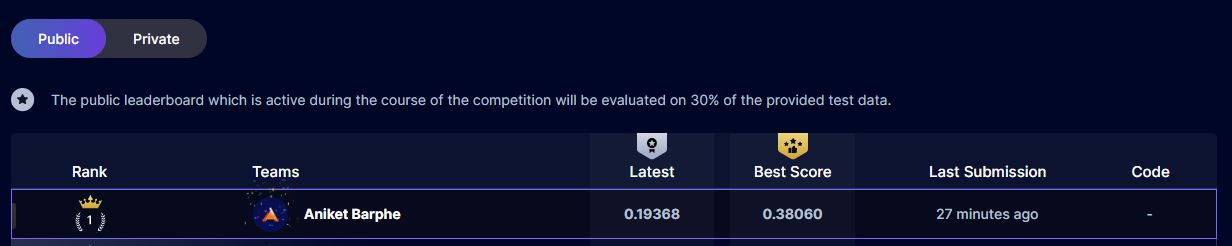

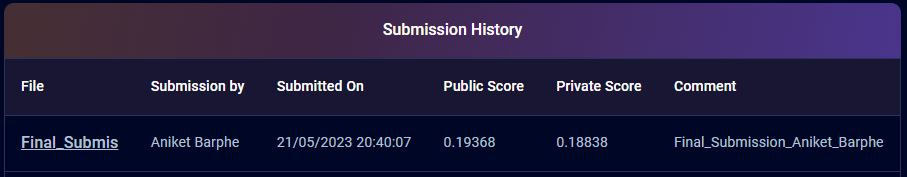

Competition Link: https://machinehack.com/hackathons/the_great_real_estate_data_challenge/leaderboard

Public Leaderboard Rank Scored: 01 out of 143 Registered Participants